<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-4" data-toc-modified-id="Project-4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 4</a></span></li><li><span><a href="#Merging-the-two-dataset" data-toc-modified-id="Merging-the-two-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Merging the two dataset</a></span><ul class="toc-item"><li><span><a href="#Correlation-between-measured-features" data-toc-modified-id="Correlation-between-measured-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correlation between measured features</a></span><ul class="toc-item"><li><span><a href="#Electricity" data-toc-modified-id="Electricity-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Electricity</a></span></li><li><span><a href="#CO2" data-toc-modified-id="CO2-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>CO2</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploratoy" data-toc-modified-id="Data-Exploratoy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploratoy</a></span><ul class="toc-item"><li><span><a href="#Numerical-features-analysis" data-toc-modified-id="Numerical-features-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerical features analysis</a></span></li><li><span><a href="#Categorical-features-analysis" data-toc-modified-id="Categorical-features-analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical features analysis</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Fill-the-NaN" data-toc-modified-id="Fill-the-NaN-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Fill the NaN</a></span></li><li><span><a href="#Linear-Correlation" data-toc-modified-id="Linear-Correlation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Linear Correlation</a></span></li></ul></li><li><span><a href="#Export-the-dataframe" data-toc-modified-id="Export-the-dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Export the dataframe</a></span></li></ul></div>

## Project 4

The objective of this project is to predict the **CO2 emissions** ('GHGEmissions') and **electricity consumption** ('SiteEnergyUse') of buildings in Seatle.  
The project is divided into two notebooks:  
- One with data exploratory analysis, where the data will be transformed  
- One with the prediction  
***
The following notebook is dedicated to the data analysis.

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Geolocalization data
from datashader.utils import lnglat_to_meters as webm

#Dimension reduction to vizualize data
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import manifold

#Graphical
# %pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Others
from collections import Counter
import os

## Merging the two dataset

In [2]:
data = pd.read_csv("data/2015-building-energy-benchmarking.csv")
data1 = pd.read_csv("data/2016-building-energy-benchmarking.csv")

Since we have two different datasets from the 2015 and 2016 years, the first objective is to join them, so that we can have a larger dataset to work with. We will study the different features of both dataset to make sure they are the same.

In [3]:
# data.head(1)
# data1.head(2)

In [4]:
#Get the columns differences
set(data.columns).symmetric_difference(set(data1.columns))

# print(set(data.columns)-set(data1.columns))
# print(set(data1.columns)-set(data.columns))

{'2010 Census Tracts',
 'Address',
 'City',
 'City Council Districts',
 'Comment',
 'Comments',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Latitude',
 'Location',
 'Longitude',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'State',
 'TotalGHGEmissions',
 'Zip Codes',
 'ZipCode'}

We have features that are similar for both 2015 and 2016 data_set, which will be rename. However, we have other features, such as City and City Council wich appear to be similar but are in fact, completly different. Those features will not be used for the prediction.

In [5]:
#Rename the same features
data1.rename(columns={'Comments':'Comment','GHGEmissionsIntensity':'GHGEmissionsIntensity(kgCO2e/ft2)',
                     'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'},inplace=True)

In [6]:
print(data['City Council Districts'].unique(),data['City Council Districts'].count())
print(data1['City'].unique())

print(data['Zip Codes'].unique())
print(data1['ZipCode'].unique())

[nan  1.  2.] 213
['Seattle']
[18081 19576 18379 18800 18383 18789 19579 18390 18377 18235 18792 18386
 17919 19575 19578 19581 19582 17920 18385 18388 19584 18798 17916 18795
 17923 17926 18229 18376 18230]
[98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98070.
 98108. 98199. 98115. 98107. 98144. 98103. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98181. 98102. 98168. 98155. 98006. 98124. 98053. 98012.
 98013. 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040.
 98204. 98177. 98020. 98272. 98145.    nan]


The features SPD Beats, OtherFuelUse(kBtu) and Seattle Police Department for the 2015's year are not present in 2016, se we remove those feature.  
The City and State features for 2016, being respectively always Seattle and WH doesn't bring new information, the same goes for the City Council features. So they will be removed as well.

In [7]:
data1['Address'][:3]

0      405 Olive way
1    724 Pine street
2    1900 5th Avenue
Name: Address, dtype: object

In [8]:
#Get the different features from both datasets to remove them
diff_2015 = ['City Council Districts', 'SPD Beats', 'Zip Codes', 'Seattle Police Department Micro Community Policing Plan Areas', 
 '2010 Census Tracts', 'OtherFuelUse(kBtu)']

diff_2016 = ['Address','State','City','ZipCode']

data.drop(columns=diff_2015, inplace=True)
data1.drop(columns=diff_2016, inplace=True)

#data1:ZipCode
#data2:['City Council Districts', 'SPD Beats', 'Zip Codes', 'Seattle Police Department Micro Community Policing Plan Areas','2010 Census Tracts', 'OtherFuelUse(kBtu)']

In [9]:
set(data.columns).symmetric_difference(set(data1.columns))

{'Latitude', 'Location', 'Longitude'}

The only feature left are the Latitude/Longitude for the 2016 dataset and Location for 2015. The Location feature for the 2015 dataset contains the latitude and longitude, we will extract it then convert it into X,Y features using the following formula:
- x = r λ cos(φ0)  
- y = r φ  
- phi0 = moyenne lat  
- phi = lat  
- lambda = long  
- latitude(degree) = Math.PI * latitude / 180  
- r = 6371

In [10]:
#Extract the latitude/longitude from the 2015 location feature
R = 6371
#Get latitude from location
def get_lat(str1):
    a= str1.split("'")
    a = float(a[3])
    return a

#Get longitude from location
def get_long(str1):
    a = str1.split("'")
    a = float(a[7])
    return a

#Get location
data["Latitude"] = data["Location"].apply(get_lat)
data["Longitude"] = data["Location"].apply(get_long)
data.drop(columns="Location", inplace=True)

PHI0 = data["Latitude"].mean()

#CONVERT LATITUDE & LONGITUDE into X,Y
def get_x(long):
    a = R*long*np.cos(np.pi*PHI0/180)
    return a

def get_y(lat):
    return R*lat

# Test with the webm package
#Transform latitude & longitude into x,y location
x, y = webm(data.Longitude, data.Latitude)
data['x'] = pd.Series(x)
data['y'] = pd.Series(y)

#For 2015
data["x_location"] = data["Longitude"].apply(get_x)
data["y_location"] = data["Latitude"].apply(get_y)

#For 2016
data1["x_location"] = data1['Longitude'].apply(get_x)
data1["y_location"] = data1['Latitude'].apply(get_y)

x1, y1 = webm(data1.Longitude, data1.Latitude)
data1['x'] = pd.Series(x1)
data1['y'] = pd.Series(y1)

data.drop(columns=["Longitude","Latitude"], inplace=True)
data1.drop(columns=["Longitude","Latitude"], inplace=True)

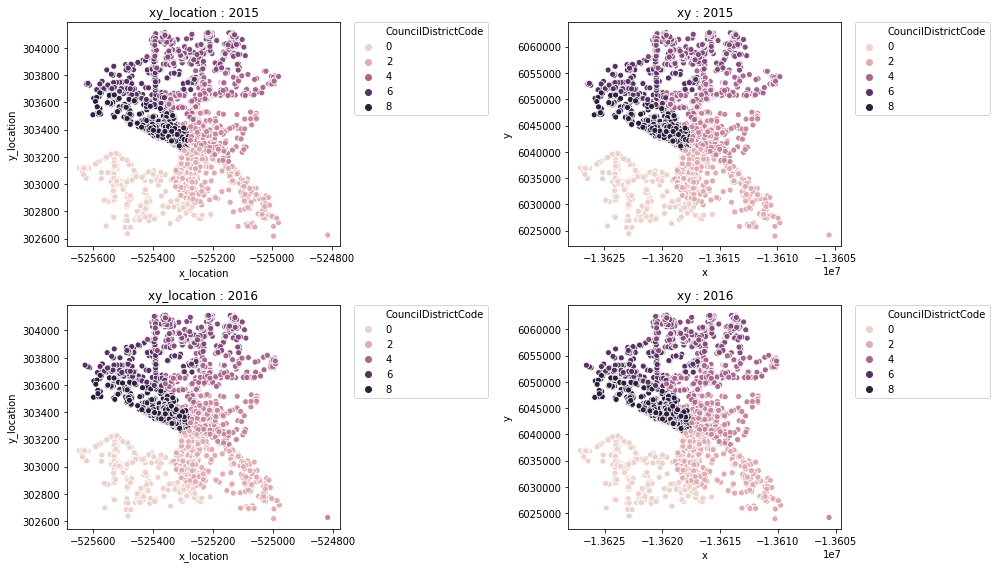

In [11]:
#Compare results for both methodologies
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#City building repartition, check if the convertion is correct
sns.scatterplot(data['x_location'],data['y_location'],hue=data.CouncilDistrictCode,ax=ax1,legend='brief')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('xy_location : 2015')

sns.scatterplot(data['x'],data['y'],hue=data.CouncilDistrictCode,ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title('xy : 2015')

sns.scatterplot(data1['x_location'],data1['y_location'],hue=data1.CouncilDistrictCode,ax=ax3,legend='brief')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax3.set_title('xy_location : 2016')

sns.scatterplot(data1['x'],data1['y'],hue=data1.CouncilDistrictCode,ax=ax4)
ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax4.set_title('xy : 2016')

plt.tight_layout()

![alt text](Seattle.jpg "Title")

In [12]:
data.drop(columns=["x_location","y_location"], inplace=True)
data1.drop(columns=["x_location","y_location"], inplace=True)

In [60]:
#Join the two dataframes
frames = [data,data1]
#Careful about the index
data_set = pd.concat(frames,sort=False,ignore_index=True)

### Correlation between measured features

The objective of this project is to predict the electricity consumption **'SiteEnergyUse'** and CO2 emission **'GHGEmissions'**. We would like to do so without doing any measurement, meaning we cannot use the features coming from any measurement, ie the following redundancy columns.  
The useless_c features are not related to this project, hence will be removed from this study.

In [61]:
data_set.shape

(6716, 42)

In [62]:
ELEC = 'SiteEnergyUse(kBtu)'
CO2 = 'GHGEmissions(MetricTonsCO2e)'

#The objective is to determine the CO2 and electricity consumption, the following columns are redundant
redundancy_elec_c = ['SteamUse(kBtu)','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                     'Electricity(kWh)', 'SiteEnergyUseWN(kBtu)','Electricity(kBtu)']

redundancy_co2_c = ['NaturalGas(therms)', 'NaturalGas(kBtu)','GHGEmissionsIntensity(kgCO2e/ft2)']

#Columns with generic data, not related to the electricity nor CO2 emission
useless_c = ['OSEBuildingID', 'DataYear','PropertyName','TaxParcelIdentificationNumber',
             'YearsENERGYSTARCertified','Comment','DefaultData']

**PropertyName**: not use because we have the property type (ie hotel, school, ...). The information we could get from this feature would be the building type, which we already have  
**Comment**: only 13 comments out of the 6716 elements, so will not be used  
**DefaultData**: feature not relevant to this project 
**TaxParcelIdentificationNumber**, **OSEBuildingID**: we already have the position of each building, so having another ID to identify the build or position will just be redundant information  
**YearsENERGYSTARCertified**: this feature only have less than 10% non-NaN value, so will not be used

In [63]:
# print(data_set['Comment'][data_set['Comment'].notnull()])
# data_set['ComplianceStatus'].unique()
# data_set['DefaultData'].unique()
data_set['PropertyName'][:3]
# data_set['TaxParcelIdentificationNumber'].nunique()

0    MAYFLOWER PARK HOTEL
1         PARAMOUNT HOTEL
2            WESTIN HOTEL
Name: PropertyName, dtype: object

In [64]:
#Default data
print('**Default data**:')
for i in data_set['DefaultData'].unique():
    print(i,sum(data_set['DefaultData']==i))
# print("------")
# print('**Compliance Status**:')
# #Compliance Status
# for i in data_set['ComplianceStatus'].unique():
#     print(i,sum(data_set['ComplianceStatus']==i))

**Default data**:
No 2791
Yes 548
nan 0
False 3263
True 113


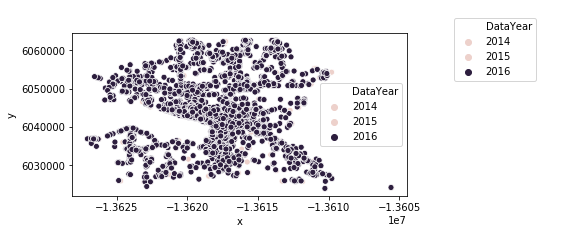

In [65]:
#Check if same OSEBuildingID from 2015 and 2016 means that the building are the same 
fig = plt.figure(figsize=(6,3))
sns.scatterplot(data_set['x'],data_set['y'],hue=data_set.DataYear)
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [66]:
data_set['YearsENERGYSTARCertified'].nunique()

116

#### Electricity

(9.0, 0.0)

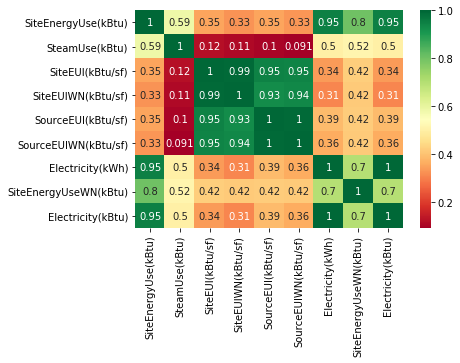

In [67]:
#Get correlations of electricity related features in the dataset 
electricity_c = [ELEC] + redundancy_elec_c
corrmat = data_set[electricity_c].corr()
top_corr_features = corrmat.index
plt.figure()
g=sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

#### CO2

(4.0, 0.0)

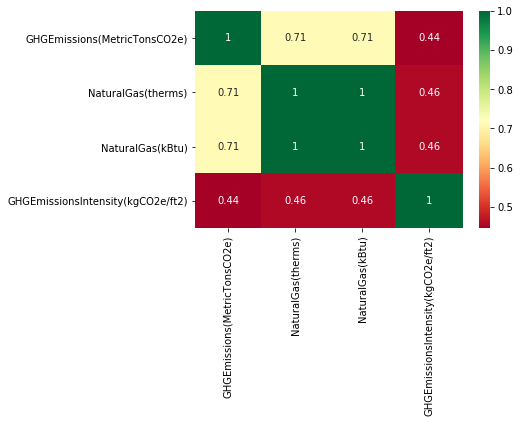

In [68]:
#Get correlations of CO2 emission related features in dataset 
co2_c = [CO2] + redundancy_co2_c 
corrmat = data_set[co2_c].corr()
top_corr_features = corrmat.index
plt.figure()
g=sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [69]:
#Working with the selected features
columns_to_drop = []
#Non important features for the study
for i in useless_c:
    columns_to_drop.append(i)
    
#Data that are expensive to gather, hence will not be used
for i in redundancy_elec_c:
    columns_to_drop.append(i)
for i in redundancy_co2_c:
    columns_to_drop.append(i)

data_set = data_set.drop(columns=columns_to_drop)

## Data Exploratoy

In [70]:
data_set.shape

(6716, 24)

In [71]:
data_set.head()

BuildingType PrimaryPropertyType  CouncilDistrictCode Neighborhood  \
0  NonResidential               Hotel                    7     DOWNTOWN   
1  NonResidential               Hotel                    7     DOWNTOWN   
2  NonResidential               Hotel                    7     DOWNTOWN   
3  NonResidential               Hotel                    7     DOWNTOWN   
4  NonResidential               Hotel                    7     DOWNTOWN   

   YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       1927                1.0            12.0             88434   
1       1996                1.0            11.0            103566   
2       1969                1.0            41.0            961990   
3       1926                1.0            10.0             61320   
4       1980                1.0            18.0            119890   

   PropertyGFAParking  PropertyGFABuilding(s)  ...  \
0                   0                   88434  ...   
1               15064                   88502  ...   
2                   0                  961990  ...   
3                   0                   61320  ...   
4               12460                  107430  ...   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                             NaN                         NaN   
1                         15064.0                  Restaurant   
2                        100000.0               Swimming Pool   
3                             NaN                         NaN   
4                         68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                             NaN            65.0            6981428.0   
1                          4622.0            51.0            8354235.0   
2                             0.0            18.0           73130656.0   
3                             NaN             1.0           28229320.0   
4                             0.0            67.0           14829099.0   

  GHGEmissions(MetricTonsCO2e)  ComplianceStatus       Outlier             x  \
0                       249.43         Compliant           NaN -1.361860e+07   
1                       263.51         Compliant           NaN -1.361809e+07   
2                      2061.48         Compliant           NaN -1.361857e+07   
3                      1936.34         Compliant  High Outlier -1.361845e+07   
4                       507.70         Compliant           NaN -1.361893e+07   

              y  
0  6.042578e+06  
1  6.042729e+06  
2  6.042769e+06  
3  6.042912e+06  
4  6.042836e+06  

[5 rows x 24 columns]

### Numerical features analysis

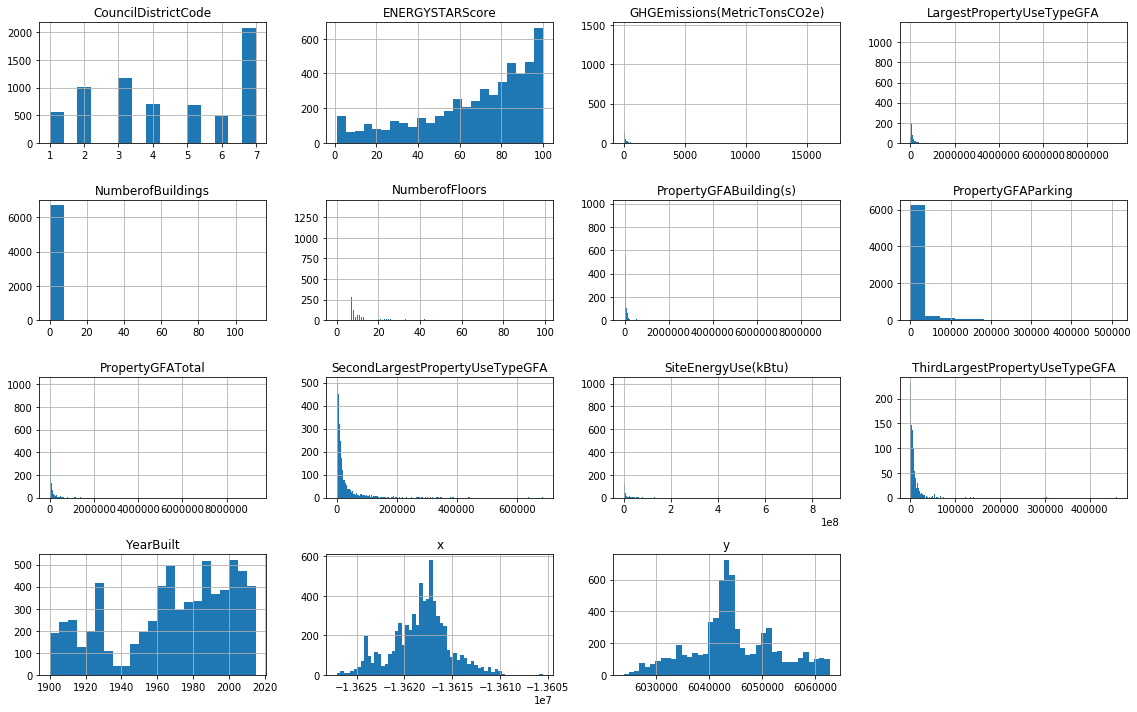

In [72]:
num_df = data_set.select_dtypes(exclude=['object']).copy()
# chart = sns.distplot(num_df.notnull(), kind=)
num_df.hist(figsize=(16,10), bins='auto')
# plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.tight_layout()

**Electricity and CO2**  
As we can see from the first graph bellow, the scale of the energy distribution and CO2 emission is uneven, in order to have a better representation, we will use the log(energy) and log(CO2). For this reason, we will also later predict the log(energy) and not the energy itself.

<bound method Figure.tight_layout of <Figure size 720x216 with 2 Axes>>

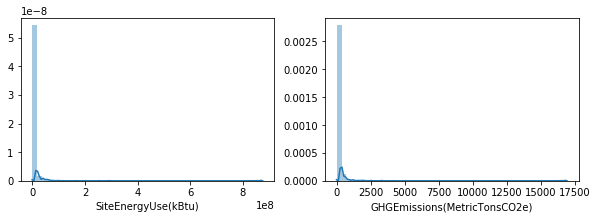

In [73]:
#Electricity and CO2 representation
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Plot the electricity consumption
ax1= sns.distplot(data_set[ELEC].dropna(),ax=ax1)

#Plot the CO2 emission
ax2 = sns.distplot(data_set[CO2].dropna(),ax=ax2)
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 720x216 with 2 Axes>>

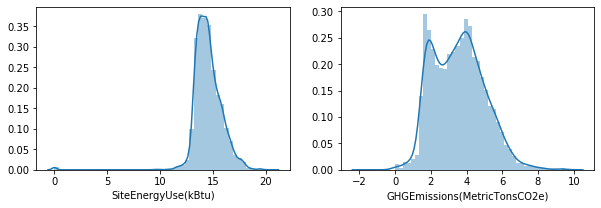

In [74]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Plot the electricity consumption
ax1= sns.distplot(np.log(1+data_set[ELEC].dropna()),ax=ax1)

#Plot the CO2 emission
ax2 = sns.distplot(np.log(1+data_set[CO2].dropna()),ax=ax2)
fig.tight_layout

In [75]:
# data_set[ELEC].sort_values()[:30]

We can see we have a number of building where we don't have the information about the electricity nor CO2 emission, we will remove them from our study.

In [76]:
data_set['SiteEnergyUse(kBtu)'][data_set['SiteEnergyUse(kBtu)']<=0]

44      0.0
572     0.0
3368    0.0
3371    0.0
3402    0.0
3421    0.0
3425    0.0
3435    0.0
3473    0.0
3479    0.0
3492    0.0
3644    0.0
3954    0.0
3970    0.0
4086    0.0
4100    0.0
4701    0.0
4889    0.0
5234    0.0
6506    0.0
Name: SiteEnergyUse(kBtu), dtype: float64

In [77]:
idxc = data_set['GHGEmissions(MetricTonsCO2e)'][data_set['GHGEmissions(MetricTonsCO2e)']<=0].index
idxe = data_set['SiteEnergyUse(kBtu)'][data_set['SiteEnergyUse(kBtu)']<=0].index

data_set.drop(index=idxc,inplace=True)
data_set.drop(index=set(idxe)-set(idxc),inplace=True)
data_set.reset_index(inplace=True,drop=True)

**Council district code and Year Build**  
We have here the council district code which is a categorical feature. Hence it will be changed into a categorical feature. The year build of a building will also be transformed into a categorical feature, where we will have group within the same decade.

In [78]:
#Convert the CouncilDistricCode into a categoriel feature
data_set['CouncilDistrictCode'] = data_set['CouncilDistrictCode'].astype('category',copy=False)
data_set['YearBuilt'] = pd.cut(data_set['YearBuilt'],bins=[i for i in range(1890,2030,10)]) #,labels=[0,1,2,3,4,5])

### Categorical features analysis

In [79]:
#Get the number of categories for each none numerical features
for i,j in enumerate(data_set.dtypes):
    if j == "object":
        print(data_set.dtypes.index[i]," ",data_set[data_set.dtypes.index[i]].nunique())

BuildingType   8
PrimaryPropertyType   32
Neighborhood   19
ListOfAllPropertyUseTypes   487
LargestPropertyUseType   57
SecondLargestPropertyUseType   50
ThirdLargestPropertyUseType   45
ComplianceStatus   4
Outlier   4


**List of all property use type**  
Since we have the property type of the building, one interesting information would be to have the number of different categories with the List of all property use types. Then we remove the ListOfAllPropertyUseTypes feature, since it would be redundant with the other features related to property type.

In [80]:
data_set['NumberOfUseTypes'] = data_set['ListOfAllPropertyUseTypes'].apply(lambda x: len(x.split(",")) 
                                                                           if str(x)!='nan' else 0)
data_set.drop(columns='ListOfAllPropertyUseTypes',inplace=True)

**Outliers**  
We have the information about outlier, that could be interesting for the buildings that are far bigger than the other of, as we saw that the distribution of output is uneven.

In [81]:
data_set['Outlier'].unique()
print('**Outlier**:')
for i in data_set['Outlier'].unique():
    print(i,sum(data_set['Outlier']==i))

**Outlier**:
nan 0
High Outlier 46
Low Outlier 38
High outlier 9
Low outlier 23


In [82]:
#Making sure that we have only 3 categories for the outliers                                              
data_set['Outlier'] = data_set['Outlier'].apply(lambda x: 'High Outlier' if x=='High outlier' 
                                                else ('Low Outlier' if x=='Low outlier' else x))
#Transform it into a numerical feature
data_set['Outlier'] = data_set['Outlier'].apply(lambda x: 10 if x=='High Outlier' 
                          else (3 if x=='Low Outlier' else 0))

**Compliance status**  
We only have 0.5% of element that are non compliant. Hence we will not use this feature.

In [83]:
# ComplianceStatus
print('**Compliance Status**:')
for i in data_set['ComplianceStatus'].unique():
    print(i,sum(data_set['ComplianceStatus']==i))

**Compliance Status**:
Compliant 6543
Not Compliant 3
Error - Correct Default Data 112
Non-Compliant 35


In [84]:
data_set.drop(columns='ComplianceStatus',inplace=True)

**Property use Type features**  
We have a lot of categories for the property type related features. As we can see from the bellow graph, 80% of the building are within the 10 most represented categories. To reduce the number of different categories, we will consider that the remaining categories will be cast into a "rest" category.

In [85]:
def frequency_distrib(cat,df):
    fig, ax = plt.subplots(figsize=(14,4))
    category = df[cat].value_counts()
    sns.set(style="darkgrid")
    f = sns.barplot(category.index, category.values).set_xticklabels(category.index,horizontalalignment='right', rotation=60)
    
def plot_distrib(cat,df):
    fig, ax1 = plt.subplots(1,1, figsize=(12, 6), sharex=True, sharey=False)
    ax2 = ax1.twinx()
    df[cat].value_counts().plot(ax=ax1, kind='bar')
    (df[cat].value_counts().cumsum()/df[cat].value_counts().sum()).plot(ax=ax2, kind='bar', alpha=0.2, color='grey', width=1)
    ax1.legend(['Values'])
    ax2.axhline(y=0.8, linestyle='--', alpha=0.3)
    ax2.legend(['80%','Cumulative frequency'])
#     ax2.axvline(x=16, linestyle='--', alpha=0.3)
    plt.grid(True, alpha=0.2)
    plt.xticks(rotation=0, ha='right')
    plt.title(cat)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()

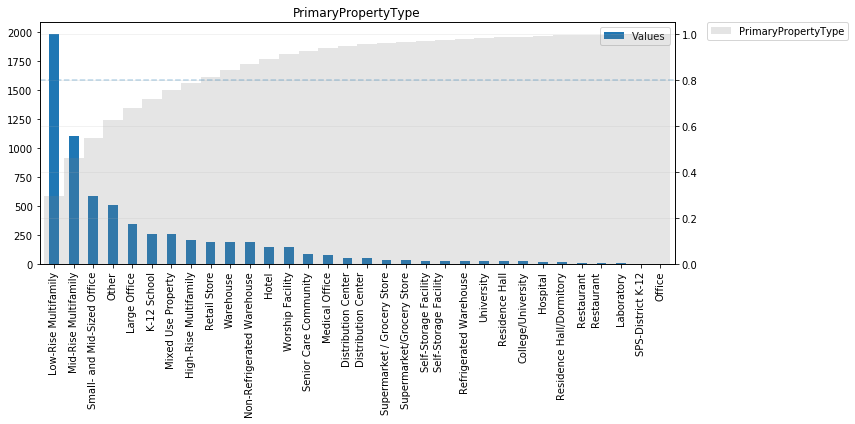

In [86]:
plot_distrib("PrimaryPropertyType",data_set)

# frequency_distrib("LargestPropertyUseType",data_set)

In [87]:
def get_cat(df, cat):
    category = df[cat].value_counts()
    return category

def get_80_percent(category):
    """Get the index where the remaining elements weights only 20% """
    percentage = [0]
    total = category.sum()
    for i in range(len(category)):
        percentage.append(category[i]/total + percentage[i])
    return len([i for i in percentage if i<0.80])

#Transform the remaining 20% values into a "rest" value
cat = []
idx = []
col = [i for i in data_set.columns if (data_set[i].dtypes=="object") and (data_set[i].nunique()>20)]
for i,feat in enumerate(col):
    cat.append(get_cat(data_set,feat))
    idx.append(get_80_percent(cat[i]))
    data_set[feat] = data_set[feat].map(lambda x: 'rest_'+feat if x in cat[i][idx[i]:] else x )

BuildingType   8
PrimaryPropertyType   10
CouncilDistrictCode   7
Neighborhood   19
YearBuilt   13
LargestPropertyUseType   7
SecondLargestPropertyUseType   5
ThirdLargestPropertyUseType   11
------
Total number of categories: 80


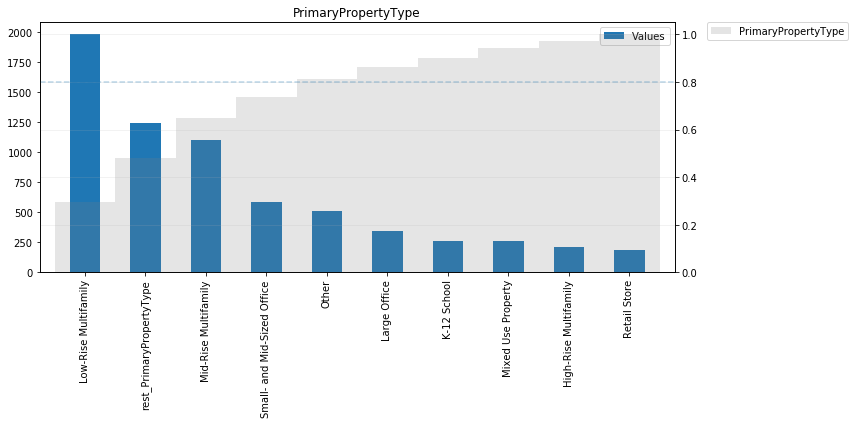

In [88]:
#CHECK RESULTS
nb_cat = 0
for i,j in enumerate(data_set.dtypes):
    if str(j) == "object" or str(j) == 'category':
        print(data_set.dtypes.index[i]," ",data_set[data_set.dtypes.index[i]].nunique())
        nb_cat = nb_cat + data_set[data_set.dtypes.index[i]].nunique()
        
print("------")
print(f"Total number of categories: {nb_cat}")
plot_distrib("PrimaryPropertyType",data_set)

### Outliers

**Univariate analysis**

The presence of outliers is normal, considering the skyscrappers in Seattle, which have number such as surface/number of floor very superior to an average building. This is why we will keep those outliers.

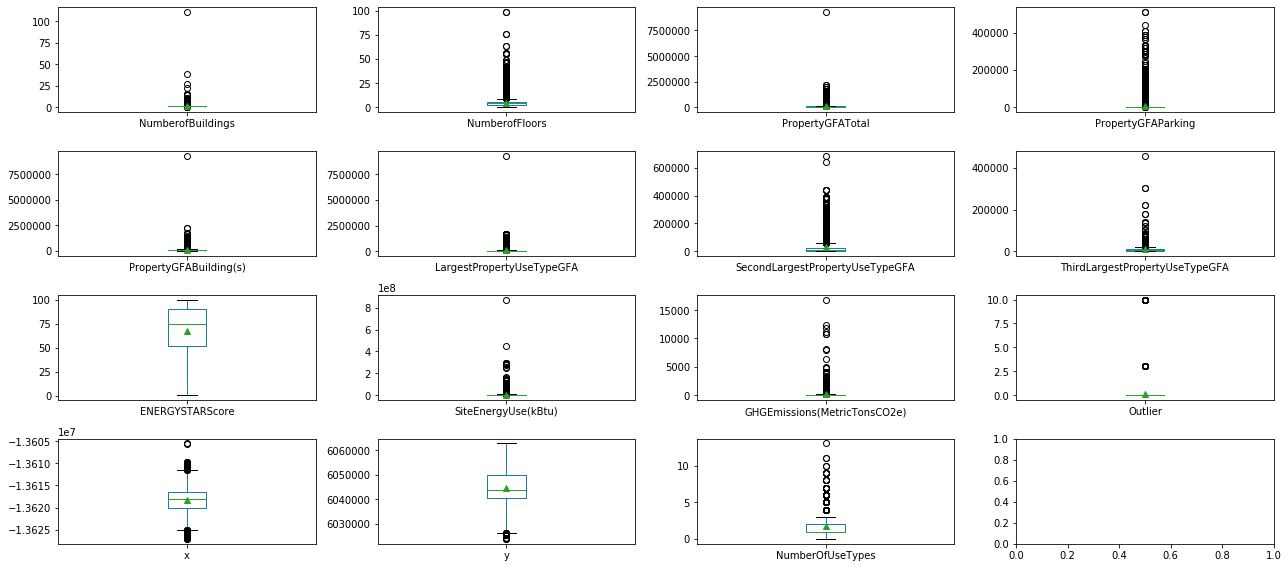

In [42]:
num = [i for i in data_set.columns if data_set[i].dtypes =='float64' or data_set[i].dtypes =='int64']
num = data_set[num].columns.tolist()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,8))
for i,feat in enumerate(num):
    data_set[feat].dropna().plot(kind='box',showmeans=True,ax=axes[i//4][i%4])
plt.tight_layout()

In [43]:
# Outlier detection
def detect_outliers(dataframe,n,features):
    """
    Return the list of the indexes corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = dataframe[col].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = dataframe[col].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step )].index
#         print(f"Number of outliers for {col}: {len(outlier_list_col)}")
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than X outliers
    
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [44]:
num = [i for i in data_set.columns if data_set[i].dtypes =='float64' or data_set[i].dtypes =='int64']
OUTLIERS_PER_OBSERVATION = 5
Outliers_to_drop = detect_outliers(data_set,OUTLIERS_PER_OBSERVATION, num)
print(f"There are {len(Outliers_to_drop)} observations with at least {OUTLIERS_PER_OBSERVATION} outliers")

# df.loc[Outliers_to_drop] # Show the outliers rows
# Drop outliers
# dfe.drop(Outliers_to_drop, axis = 0,inplace=True)

There are 385 observations with at least 5 outliers


**Dimension reduction to see outliers**

In [45]:
#Test of a PCA
pca = PCA(n_components=10)
data_set1 = data_set[num].copy()
data_set1.dropna(inplace=True)

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(data_set1[num])

pca_result = pca.fit_transform(X_std)
data_set1['pca-one'] = pca_result[:,0]
data_set1['pca-two'] = pca_result[:,1] 
data_set1['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.38814542 0.12280894 0.0818022  0.07680603 0.06728404 0.06313258
 0.0490508  0.04895338 0.03608095 0.03274368]


In [46]:
fig = px.scatter(data_set1.reset_index(), x='pca-one', y='pca-two',
                    color=ELEC, labels={'color':'SiteEnergyUse(kBtu)'}, 
                 hover_data=['NumberofBuildings','NumberofFloors','ENERGYSTARScore'])
fig.update_layout(title="PCA colored by SiteEnergyUse(kBtu)")
fig.show()

With a PCA, it appears that we might have one outlier, to confirms it we will make a t-sne to also vizualize the data with a 2 dimensions view.  
**T-SNE** 

In [47]:
tsne = manifold.TSNE(n_components=2, perplexity=20, n_iter=500, init='pca')
X_tsne = tsne.fit_transform(X_std)

data_set1['tsne-2d-one'] = X_tsne[:,0]
data_set1['tsne-2d-two'] = X_tsne[:,1]
# plt.show()

In [48]:
fig = px.scatter(data_set1.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
                    color=ELEC, labels={'color':'SiteEnergyUse(kBtu)'}, 
                 hover_data=['NumberofBuildings','NumberofFloors','ENERGYSTARScore'])
fig.update_layout(title="T-SNE colored by SiteEnergyUse(kBtu)")
fig.show()

In [49]:
fig = px.scatter(data_set1.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
                    color='ENERGYSTARScore', labels={'color':'ENERGYSTARScore'}, 
                 hover_data=['NumberofBuildings','NumberofFloors','NumberOfUseTypes'])
fig.update_layout(title="T-SNE colored by 'ENERGYSTARScore'")
fig.show()

### Fill the NaN

As we can see, we have quite a lot of missing values. To fill the NaN for the numerical values, we will take the mediane of similar building. For instance, for the number of floors, we will consider building that are within the same district and yearbuilt. The same principle goes for the rest of numerical data.  
We notice we have a few output missing, ie energy and CO2. Since it represents less than 1% of the dataset, we will remove those elements.  
For the GFA related features, meaning the surface of the building, we will set it to 0 because a NaN value means that the building does not have a second or third type of property.

In [50]:
#Features with NaN values
data_set[data_set.columns[data_set.isna().sum()>0]].isna().sum()

NumberofBuildings                     8
NumberofFloors                        8
LargestPropertyUseType              156
LargestPropertyUseTypeGFA           156
SecondLargestPropertyUseType       3460
SecondLargestPropertyUseTypeGFA    3460
ThirdLargestPropertyUseType        5540
ThirdLargestPropertyUseTypeGFA     5540
ENERGYSTARScore                    1604
SiteEnergyUse(kBtu)                  15
GHGEmissions(MetricTonsCO2e)         19
dtype: int64

In [51]:
def replace_nan_quanti(data,quant_var,qual_var):
    """Fill the NaN of numerical features by taking the median of similar elements"""
    index_NaN_quant = list(data_set[quant_var][data_set[quant_var].isnull()].index)
    for i in index_NaN_quant:
        quant_med = data_set[quant_var].median()
        if len(qual_var)>1:
            quant_pred = data_set[quant_var][((data_set[qual_var[0]] == data_set.iloc[i][qual_var[0]]) & (data_set[qual_var[1]] == data_set.iloc[i][qual_var[0]]))].median()
        else:
            quant_pred = data_set[quant_var][data_set[qual_var[0]] == data_set.iloc[i][qual_var[0]]].median()
        
        if not np.isnan(quant_pred):
            data_set[quant_var].iloc[i] = quant_pred
        else:
            data_set[quant_var].iloc[i] = quant_med

In [52]:
#Fill NaN of numerical features
replace_nan_quanti(data_set,"ENERGYSTARScore",["BuildingType","YearBuilt"])
replace_nan_quanti(data_set,"NumberofFloors",["YearBuilt","CouncilDistrictCode"])
replace_nan_quanti(data_set,"NumberofBuildings",["YearBuilt","CouncilDistrictCode"])

#Convert NaN values for primary, secondary and tertiary property use
def convert_nan_zero(gfa):
    if np.isnan(gfa):
        gfa = 0
    return gfa

#Get 0m^2 for the surface if the surface type does not exist
data_set["LargestPropertyUseTypeGFA"] = data_set["LargestPropertyUseTypeGFA"].apply(convert_nan_zero)
data_set["SecondLargestPropertyUseTypeGFA"] = data_set["SecondLargestPropertyUseTypeGFA"].apply(convert_nan_zero)
data_set["ThirdLargestPropertyUseTypeGFA"] = data_set["ThirdLargestPropertyUseTypeGFA"].apply(convert_nan_zero)

#Drop NaN values for the Electricity and CO2 emission
data_set.dropna(subset=[CO2,ELEC], inplace=True)

C:\Users\jules\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
# # Fill Categorical features
index_largestproperty = list(data_set['LargestPropertyUseType'][data_set['LargestPropertyUseType'].isnull()].index)
for i in index_largestproperty:
    data_set['LargestPropertyUseType'].iloc[i] = data_set['PrimaryPropertyType'].iloc[i]
#     data_set['LargestPropertyUseType'].iloc[i] = data_set['PrimaryPropertyType'].iloc[i]

# data_set[['PrimaryPropertyType','LargestPropertyUseType']][:5]
# data_set[data_set['PrimaryPropertyType']!=data_set['LargestPropertyUseType']].index.size

In [54]:
#CHECK RESULTS
print(f"Size of the data set: {data_set.index.size}")
data_set[data_set.columns[data_set.isna().sum()>0]].isna().sum()

Size of the data set: 6674


LargestPropertyUseType           135
SecondLargestPropertyUseType    3442
ThirdLargestPropertyUseType     5521
dtype: int64

The last missing data are from categorical features, the missing data will be automatically filled by 0 with the OneHotEncoding.

In [55]:
# data_set.columns
#FEATURES ENGINEERING: Get the total surface available from buildings
# data_set['GFABuildings'] = data_set['PropertyGFABuilding(s)']*data_set['NumberofFloors']*data_set['NumberofBuildings']

### Linear Correlation

We can notice that several features are highly correlated (LargestPropertyUseTypeGFA and PropertyGFATotal). It could be interesting to do a PCA to remove the correlated features.

(15.0, 0.0)

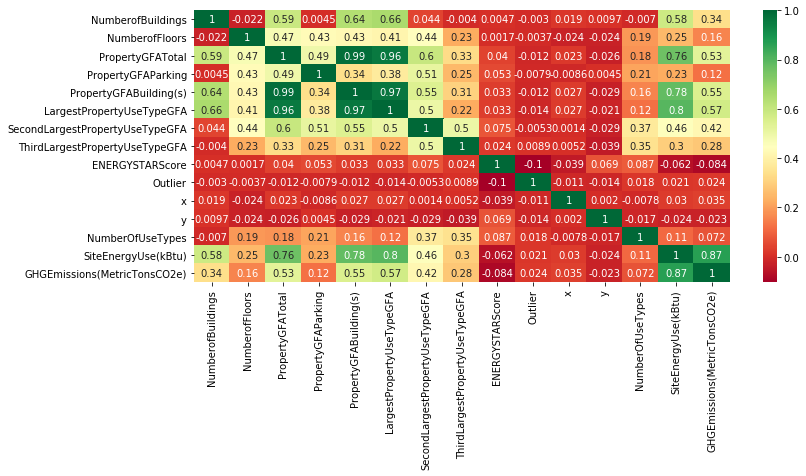

In [56]:
#Get the output at last
data_set = data_set[[c for c in data_set.columns if (c!= ELEC)] + [ELEC]]
data_set = data_set[[c for c in data_set.columns if (c!= CO2)] + [CO2]]

#get correlations of each features in dataset
corrmat = data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,5))
g=sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [57]:
#Convert all categoriel features
data_set = pd.get_dummies(data_set)

#Get the output at last
data_set = data_set[[c for c in data_set.columns if (c!= ELEC)] + [ELEC]]
data_set = data_set[[c for c in data_set.columns if (c!= CO2)] + [CO2]]

## Export the dataframe

In [58]:
#Export the cleaned data into a csv file
if os.path.exists("data/cleaned_dataframe.csv"):
    os.remove('data/cleaned_dataframe.csv')
    export_csv = data_set.to_csv (r'data/cleaned_dataframe.csv', index = None, header=True)
else:
    export_csv = data_set.to_csv (r'data/cleaned_dataframe.csv', index = None, header=True)